In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV


## scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
## pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, PolynomialFeatures,OneHotEncoder
from sklearn_features.transformers import DataFrameSelector
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor



In [344]:
df = pd.read_excel('Data_Train.xlsx')

In [345]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [347]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [348]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [351]:
df['Month']=df['Date_of_Journey'].dt.month
df['Day']=df['Date_of_Journey'].dt.day
df['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int64)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int64         
 12  Day              10683 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1.1+ MB


In [247]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [248]:
df['Additional_Info'].replace(to_replace='No Info',value='No info',inplace=True)

In [249]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [250]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4,27
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [251]:
# Format Dep_Time and Arrival_Time to include only hour and minute
df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.strftime('%H:%M')
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time']).dt.strftime('%H:%M')
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M') 
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M')  


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int64         
 12  Day              10683 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 1.1+ MB


In [357]:
df['Duration'] = df['Duration'].apply(pd.to_timedelta)

In [353]:
 df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [354]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop', '0 stop')

In [355]:
df['Total_Stops'] = df['Total_Stops'].fillna('0 stop')

In [356]:
 df['Total_Stops'].unique()

array(['0 stop', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [264]:

df['Total_Stops'] = df['Total_Stops'].str.replace(r'\D', '', regex=True).astype(int)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10683 non-null  object         
 1   Date_of_Journey  10683 non-null  datetime64[ns] 
 2   Source           10683 non-null  object         
 3   Destination      10683 non-null  object         
 4   Route            10682 non-null  object         
 5   Dep_Time         10683 non-null  datetime64[ns] 
 6   Arrival_Time     10683 non-null  datetime64[ns] 
 7   Duration         10683 non-null  timedelta64[ns]
 8   Total_Stops      10683 non-null  int32          
 9   Additional_Info  10683 non-null  object         
 10  Price            10683 non-null  int64          
 11  Month            10683 non-null  int64          
 12  Day              10683 non-null  int64          
dtypes: datetime64[ns](3), int32(1), int64(3), object(5), timedelta64[ns](1)
memo

In [266]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,0 days 02:50:00,0,No info,3897,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,0 days 07:25:00,2,No info,7662,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,0 days 19:00:00,2,No info,13882,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,0 days 05:25:00,1,No info,6218,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,0 days 04:45:00,1,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,0 days 02:30:00,0,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,0 days 02:35:00,0,No info,4145,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,0 days 03:00:00,0,No info,7229,4,27
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,0 days 02:40:00,0,No info,12648,3,1


In [267]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
9039,Air India,2019-05-06,Delhi,Cochin,NaN,1900-01-01 09:45:00,1900-01-01 09:25:00,0 days 23:40:00,0,No info,7480,5,6


In [268]:
df.dropna(subset=['Route'], inplace=True)


In [269]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day


In [270]:
df['stops'] = df['Route'].str.count('→') - 1


In [271]:
(df['Total_Stops']-df['stops'] ).unique()

array([0], dtype=int64)

In [272]:
df.drop(columns='stops',inplace=True)

In [273]:
df.isna().sum().sort_values(ascending=False)/df.shape[0]

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
Month              0.0
Day                0.0
dtype: float64

<Axes: >

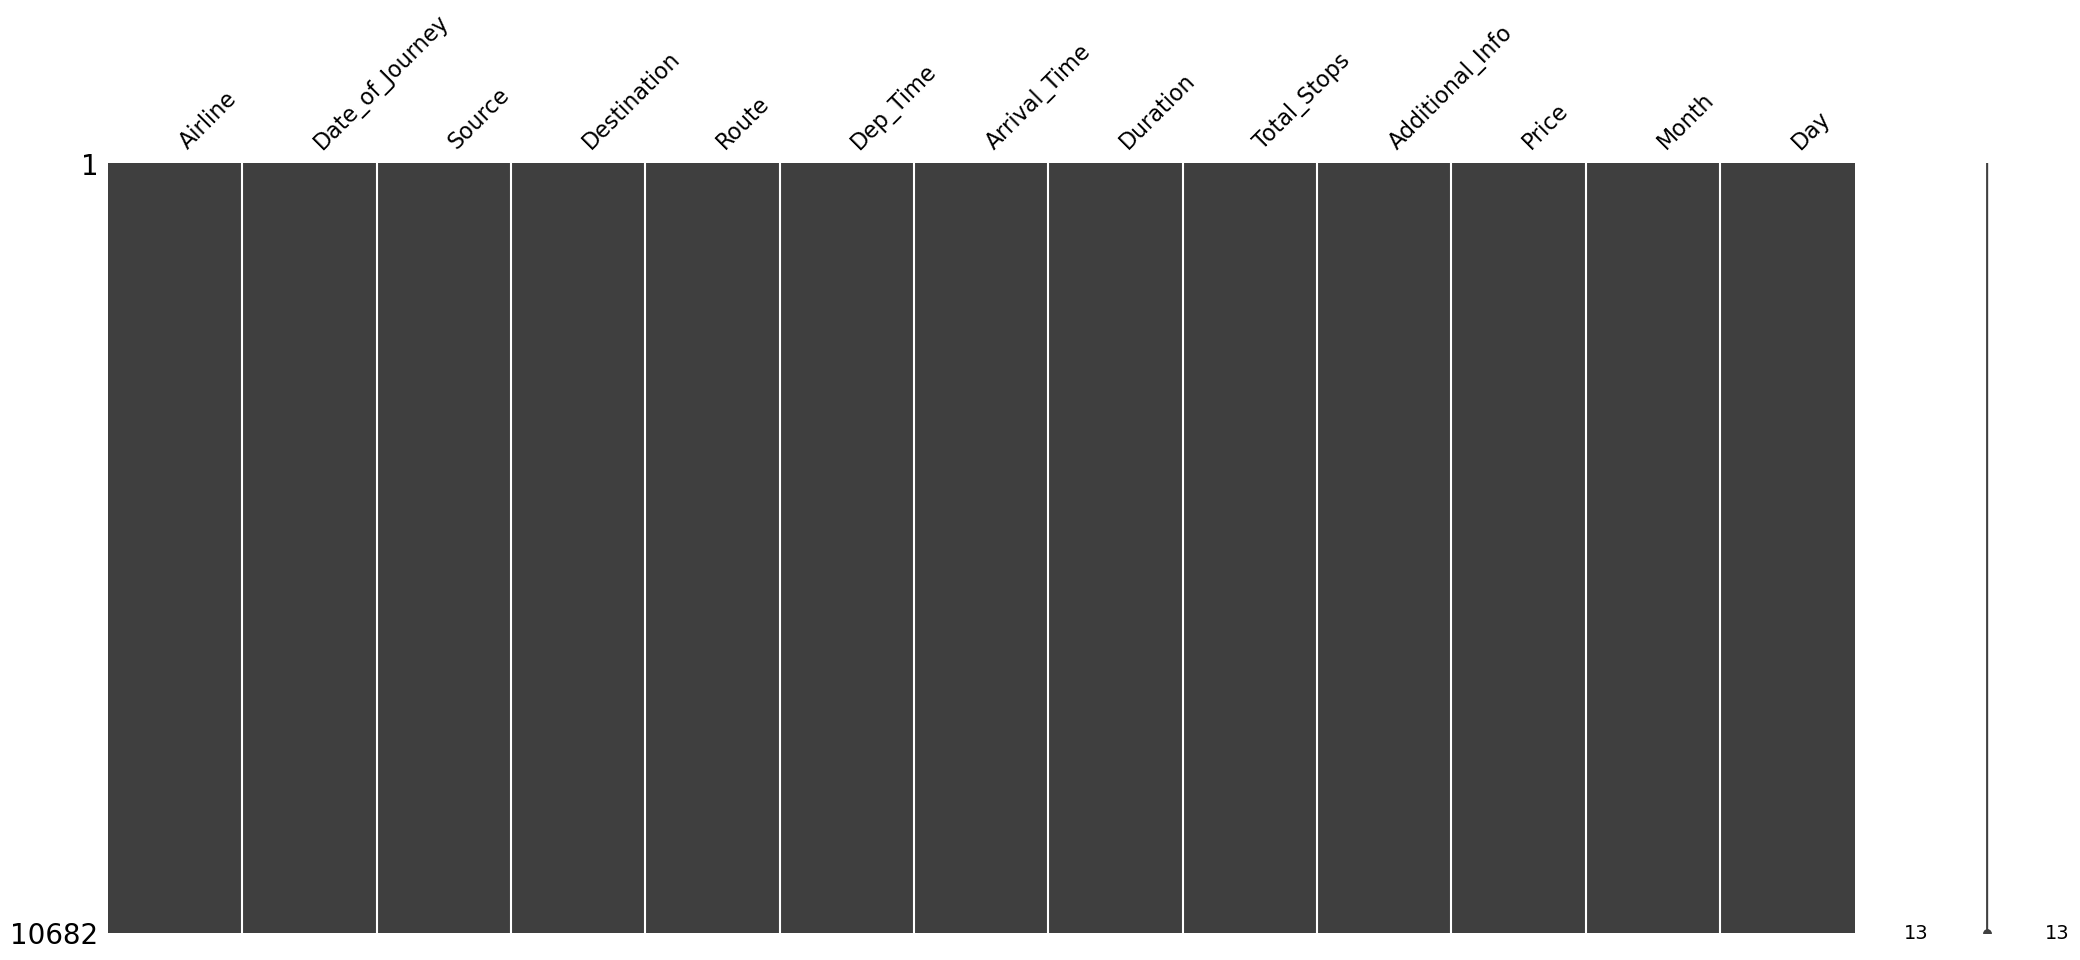

In [274]:
missingno.matrix(df)

In [275]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [276]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [277]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [278]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [317]:
df['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

In [318]:
df['Time_of_Day'].unique()

array(['Night', 'Midnight', 'Morning', 'Evening', 'Afternoon'],
      dtype=object)

In [281]:
def classify_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Dep_Time'].dt.hour.apply(classify_time_of_day)

In [282]:
df.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'],inplace=True)

In [283]:
df.duplicated().sum()

453

In [284]:
df[df.duplicated()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Time_of_Day
523,SpiceJet,Chennai,Kolkata,0 days 02:15:00,0,No check-in baggage included,3543,5,21,Morning
524,Jet Airways,Banglore,New Delhi,0 days 07:15:00,1,In-flight meal not included,7832,3,21,Morning
683,Jet Airways,Delhi,Cochin,0 days 13:50:00,2,No info,13376,6,1,Afternoon
1061,Air India,Delhi,Cochin,0 days 21:15:00,2,No info,10231,5,21,Night
1242,IndiGo,Mumbai,Hyderabad,0 days 01:25:00,0,No info,2754,3,15,Evening
...,...,...,...,...,...,...,...,...,...,...
10664,IndiGo,Banglore,Delhi,0 days 02:55:00,0,No info,4823,4,9,Evening
10665,IndiGo,Kolkata,Banglore,0 days 02:30:00,0,No info,4804,4,27,Afternoon
10672,Jet Airways,Delhi,Cochin,0 days 19:55:00,2,In-flight meal not included,11150,6,27,Night
10673,Jet Airways,Delhi,Cochin,0 days 15:00:00,2,No info,16704,5,27,Afternoon


In [285]:
df.drop_duplicates(inplace=True)

In [286]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Time_of_Day
0,IndiGo,Banglore,New Delhi,0 days 02:50:00,0,No info,3897,3,24,Night
1,Air India,Kolkata,Banglore,0 days 07:25:00,2,No info,7662,5,1,Midnight
2,Jet Airways,Delhi,Cochin,0 days 19:00:00,2,No info,13882,6,9,Morning
3,IndiGo,Kolkata,Banglore,0 days 05:25:00,1,No info,6218,5,12,Evening
4,IndiGo,Banglore,New Delhi,0 days 04:45:00,1,No info,13302,3,1,Afternoon
...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,0 days 02:40:00,0,No check-in baggage included,3257,5,21,Midnight
10678,Air Asia,Kolkata,Banglore,0 days 02:30:00,0,No info,4107,4,9,Evening
10679,Air India,Kolkata,Banglore,0 days 02:35:00,0,No info,4145,4,27,Evening
10681,Vistara,Banglore,New Delhi,0 days 02:40:00,0,No info,12648,3,1,Morning


In [287]:
df['Duration'] = df['Duration'].dt.total_seconds() / 60


In [330]:
df['Duration'].max()

2860.0

In [288]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Time_of_Day
0,IndiGo,Banglore,New Delhi,170.0,0,No info,3897,3,24,Night
1,Air India,Kolkata,Banglore,445.0,2,No info,7662,5,1,Midnight
2,Jet Airways,Delhi,Cochin,1140.0,2,No info,13882,6,9,Morning
3,IndiGo,Kolkata,Banglore,325.0,1,No info,6218,5,12,Evening
4,IndiGo,Banglore,New Delhi,285.0,1,No info,13302,3,1,Afternoon
...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,160.0,0,No check-in baggage included,3257,5,21,Midnight
10678,Air Asia,Kolkata,Banglore,150.0,0,No info,4107,4,9,Evening
10679,Air India,Kolkata,Banglore,155.0,0,No info,4145,4,27,Evening
10681,Vistara,Banglore,New Delhi,160.0,0,No info,12648,3,1,Morning


## Univariate

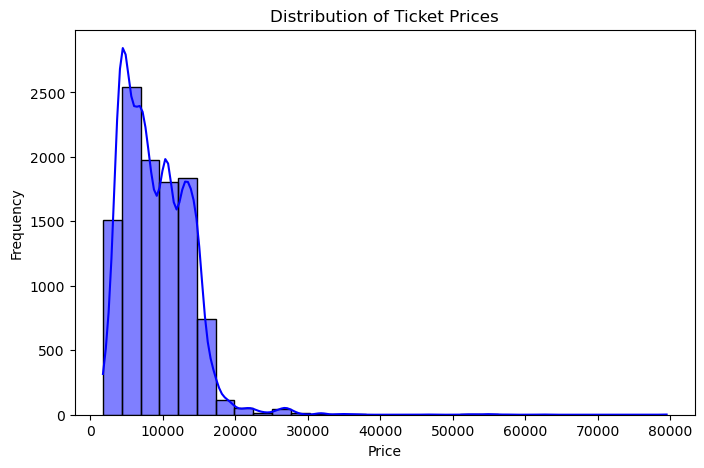

In [359]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

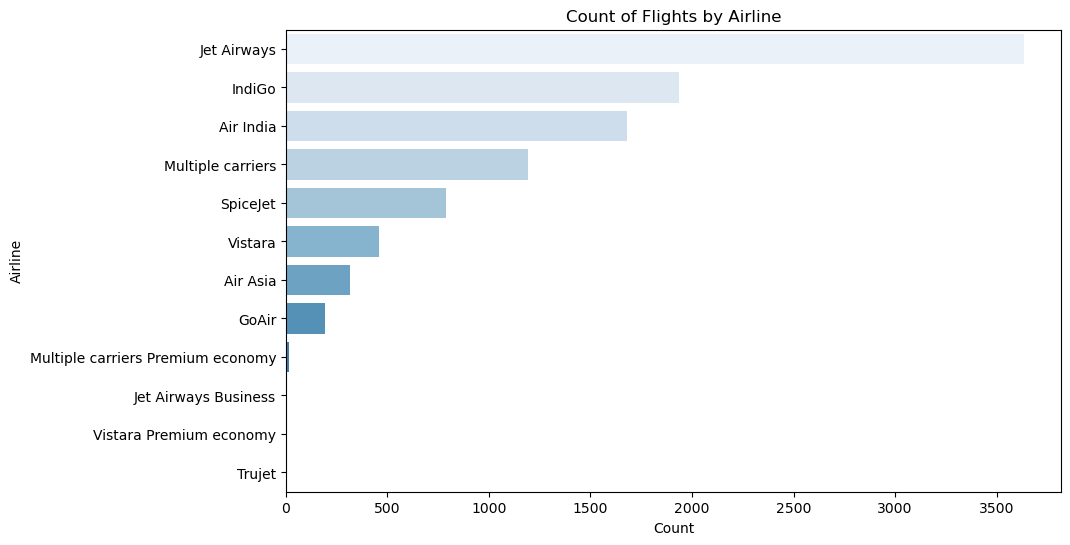

In [290]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index, palette='Blues')
plt.title('Count of Flights by Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

C:\Users\hsoopa\AppData\Local\Temp\ipykernel_6344\1936147846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


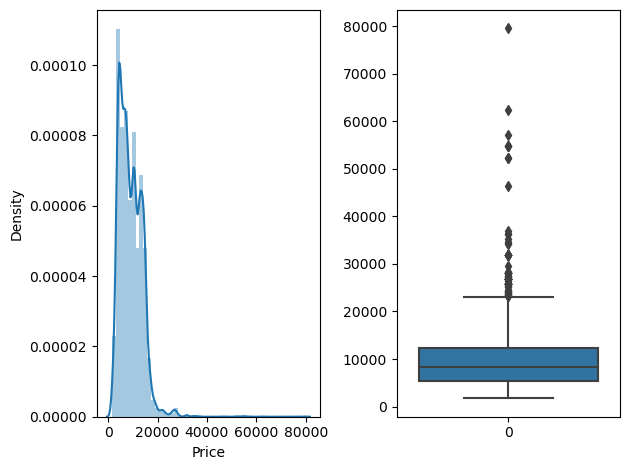

In [292]:
plot(df,'Price')

In [293]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

C:\Users\hsoopa\AppData\Local\Temp\ipykernel_6344\1936147846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


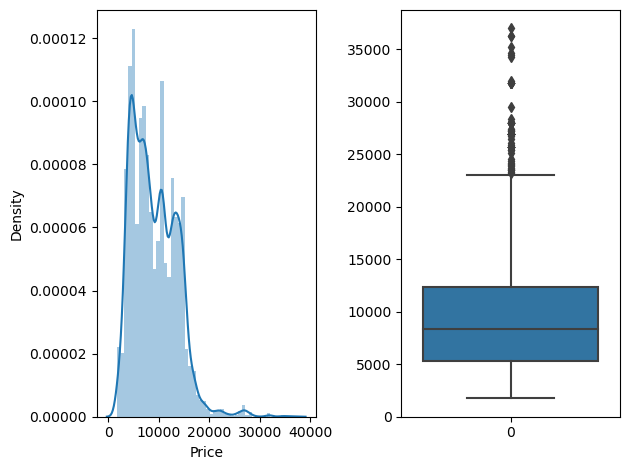

In [294]:
plot(df,'Price')

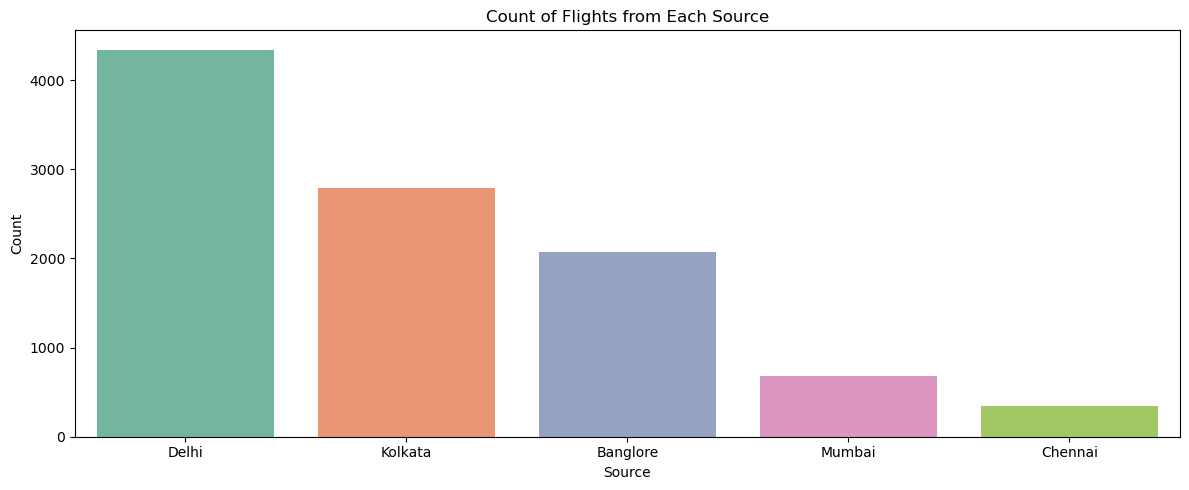

In [295]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Source', palette='Set2', order=df['Source'].value_counts().index)
plt.title('Count of Flights from Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

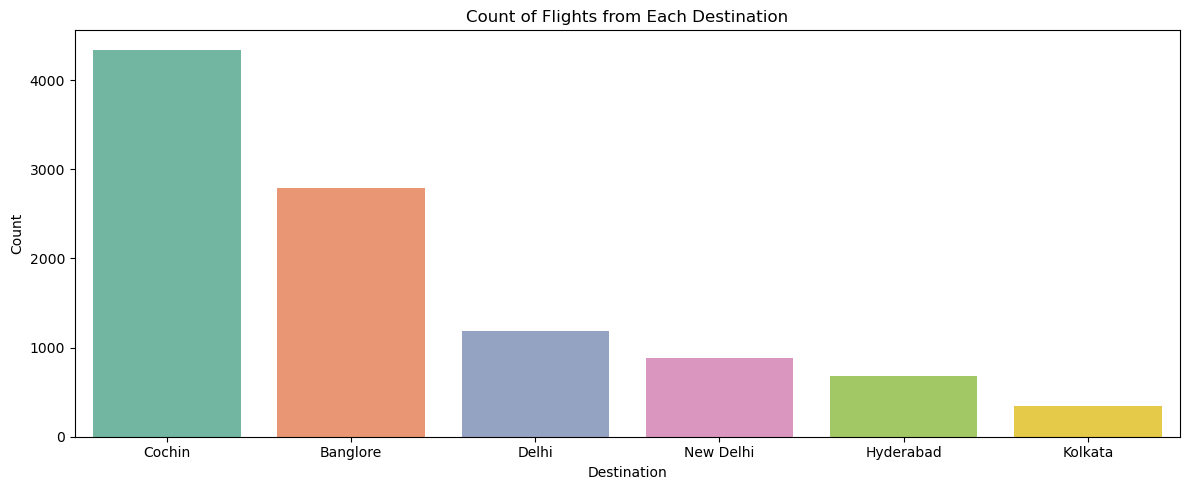

In [296]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Destination', palette='Set2', order=df['Destination'].value_counts().index)
plt.title('Count of Flights from Each Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

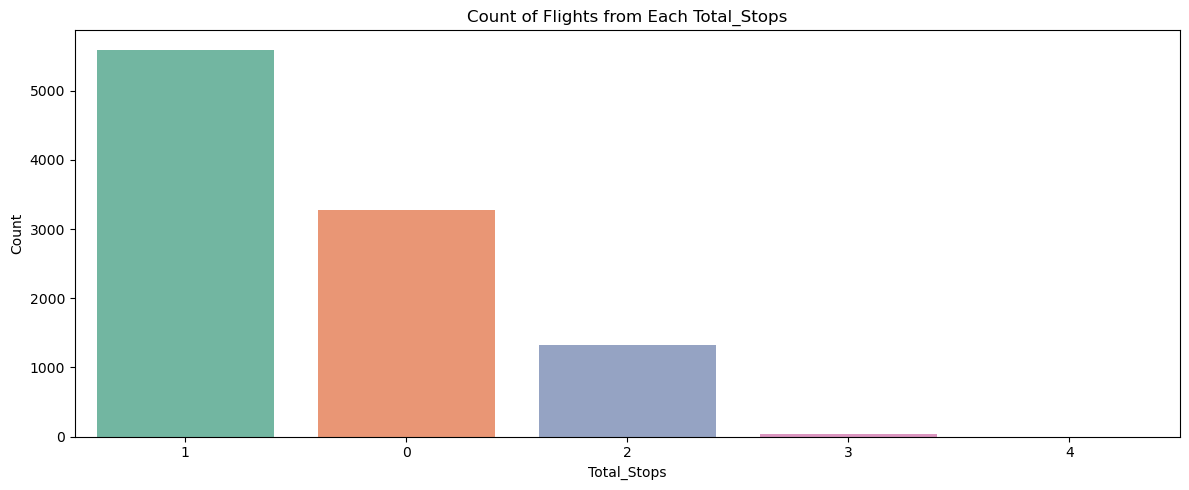

In [297]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Total_Stops', palette='Set2', order=df['Total_Stops'].value_counts().index)
plt.title('Count of Flights from Each Total_Stops')
plt.xlabel('Total_Stops')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Bivariate

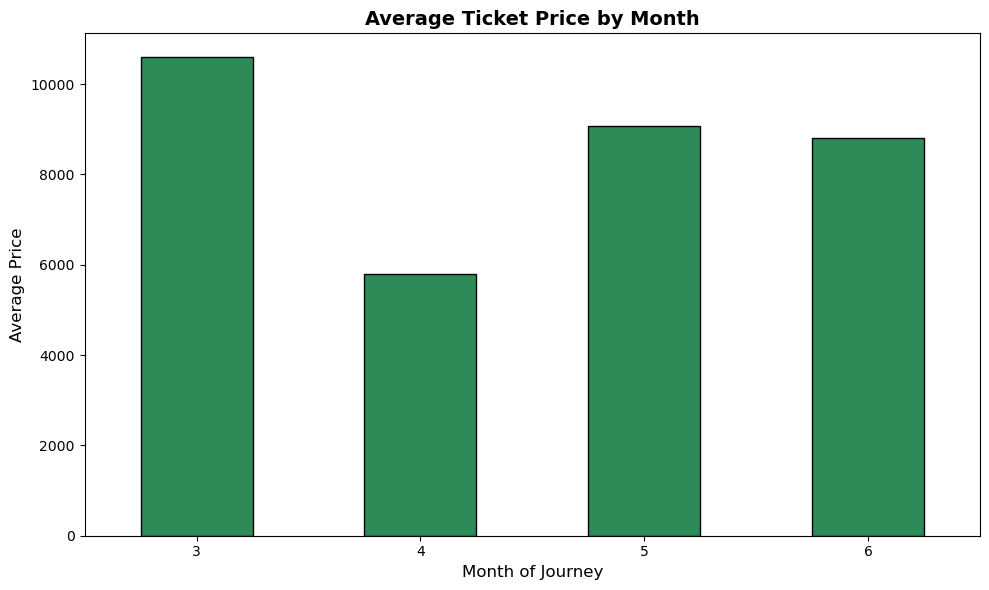

In [298]:
plt.figure(figsize=(10, 6))
average_price_by_month = df.groupby('Month')['Price'].mean()  
average_price_by_month.plot(kind='bar', color='seagreen', edgecolor='black') 

plt.title('Average Ticket Price by Month', fontsize=14, fontweight='bold') 
plt.xlabel('Month of Journey', fontsize=12)  
plt.ylabel('Average Price', fontsize=12)  
plt.xticks(rotation=0, fontsize=10) 
plt.tight_layout()  
plt.show()


## Multivariate

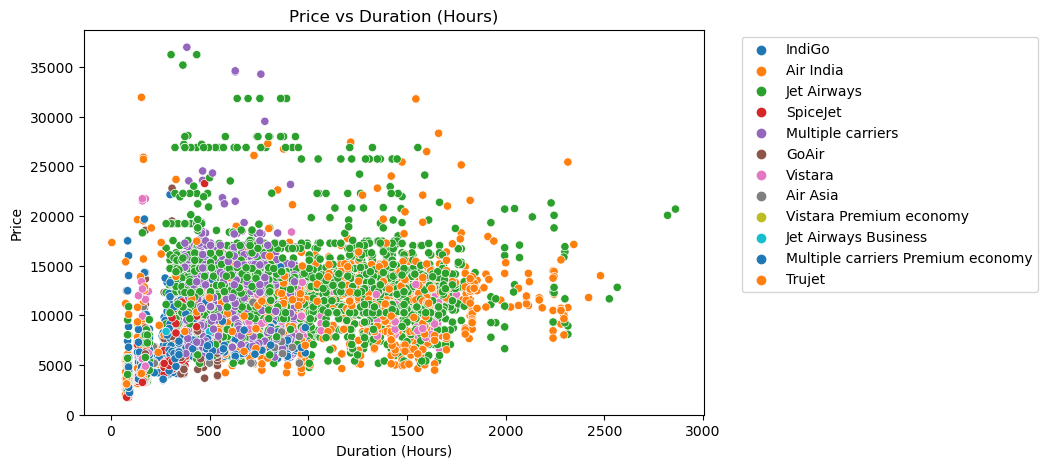

In [299]:
# 3. Scatter plot for Price vs Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration', y='Price', data=df, hue='Airline', palette='tab10')
plt.title('Price vs Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


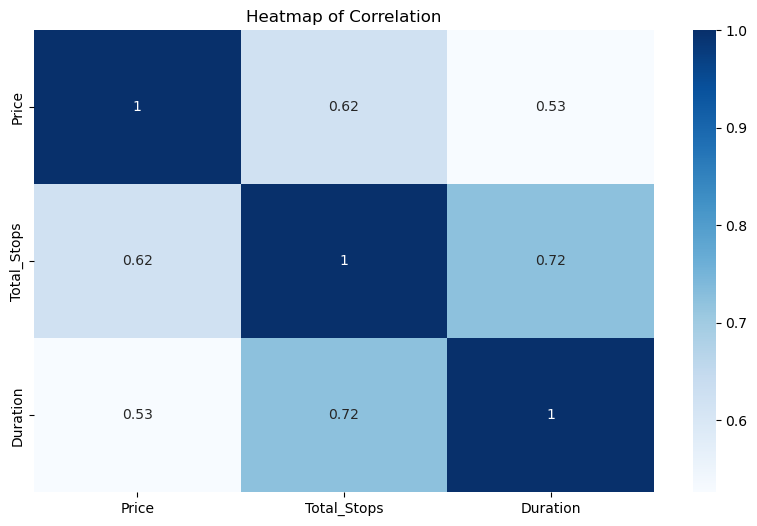

In [300]:
# Multivariate Analysis
# 5. Heatmap of Correlation between Numerical Features
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price', 'Total_Stops', 'Duration']].corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Correlation')
plt.show()

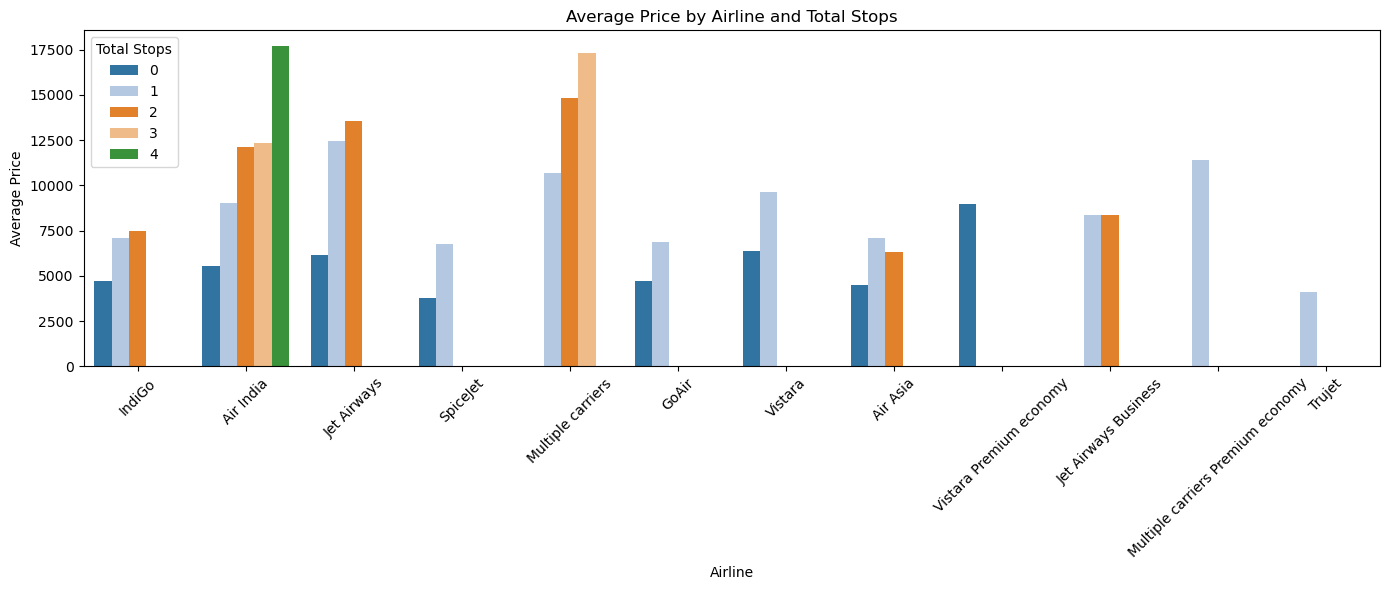

In [301]:
# 6. Grouped Bar Chart for Airline vs Price by Total Stops
plt.figure(figsize=(14, 6))
sns.barplot(x='Airline', y='Price', hue='Total_Stops', data=df, errorbar=None, palette='tab20')
plt.title('Average Price by Airline and Total Stops')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.tight_layout()
plt.show()

## pre-processing

In [302]:
x = df.drop("Price" , axis = 1)
y = df["Price"]

In [303]:
numCols = x.select_dtypes(include="number")
catCols = x.select_dtypes(include="object")
numCols.info(), catCols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10229 entries, 0 to 10682
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Duration     10229 non-null  float64
 1   Total_Stops  10229 non-null  int32  
 2   Month        10229 non-null  int64  
 3   Day          10229 non-null  int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 617.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10229 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10229 non-null  object
 1   Source           10229 non-null  object
 2   Destination      10229 non-null  object
 3   Additional_Info  10229 non-null  object
 4   Time_of_Day      10229 non-null  object
dtypes: object(5)
memory usage: 737.5+ KB


(None, None)

In [304]:
numSteps = list()
numSteps.append(("Num_Imputer" , SimpleImputer(strategy="median")))
numSteps.append(("Scaler" , StandardScaler()))
numPipeline = Pipeline(steps=numSteps)

In [305]:
catSteps = list()
catSteps.append(("Cat_Imputer" , SimpleImputer(strategy='most_frequent')))
catSteps.append(("Cat_Encoder" , OneHotEncoder(sparse_output=True , drop='first', handle_unknown='ignore')))
catPipeline = Pipeline(steps= catSteps)

In [306]:
transformer = ColumnTransformer(transformers=[('Num' , numPipeline , numCols.columns) , 
                                              ('Cat' , catPipeline , catCols.columns) ] , remainder='passthrough')

In [307]:
models = list()
models.append(("LR" , LinearRegression()))
models.append(("SGD" , SGDRegressor()))
models.append(("Decision_Tree" , DecisionTreeRegressor()))
models.append(("RF" , RandomForestRegressor()))
models.append(("GB", GradientBoostingRegressor()))



In [308]:
for model in models:
    steps = list()
    steps.append(("Preprocessing" , transformer))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , scoring="r2"  ,cv = 5 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")


C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning:

LR
Train_accuracy 0.6780012728876137
----------
Test_accuracy 0.6746301514042491
--------------------




C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


SGD
Train_accuracy 0.66216563845528
----------
Test_accuracy 0.6597985924447671
--------------------




C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Decision_Tree
Train_accuracy 0.9916437600990354
----------
Test_accuracy 0.8000360398863341
--------------------




C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RF
Train_accuracy 0.9770950838971263
----------
Test_accuracy 0.8739625642061062
--------------------




C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


GB
Train_accuracy 0.8245200612791918
----------
Test_accuracy 0.8158947604055322
--------------------




C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [309]:
steps = list()
steps.append(("Preprocessing", transformer))
steps.append(("RF", RandomForestRegressor(
    n_estimators=150,
    max_depth=6,
    min_samples_split=7,
    min_samples_leaf=7,
    bootstrap=True,
    random_state=610
)))
pipeline = Pipeline(steps=steps)
scores = cross_validate(pipeline, x, y, scoring="r2", cv=5, return_train_score=True)
print(scores)

C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([6.80524826, 7.68804169, 7.29937983, 7.99400902, 8.33179307]), 'score_time': array([0.09304786, 0.11808085, 0.10288858, 0.13877296, 0.11082411]), 'test_score': array([0.79765828, 0.81550072, 0.79406609, 0.7842522 , 0.78704281]), 'train_score': array([0.80713312, 0.80452003, 0.80590639, 0.81118842, 0.81196108])}


In [310]:
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())

Train_accuracy 0.8081418086164189
----------
Test_accuracy 0.7957040199097536


In [311]:
steps2 = list()
steps2.append(("Preprocessing", transformer))
steps2.append(("Decision_Tree" , DecisionTreeRegressor(
     max_depth= 6,
     min_samples_split=20,
     min_samples_leaf= 20,

)))
pipeline2 = Pipeline(steps=steps2)
scores2 = cross_validate(pipeline2, x, y, scoring="r2", cv=5, return_train_score=True)
print(scores2)

C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([0.11551452, 0.1490705 , 0.16428518, 0.13769197, 0.15790415]), 'score_time': array([0.02906609, 0.04881334, 0.0254283 , 0.03297806, 0.02609277]), 'test_score': array([0.7707584 , 0.79260221, 0.77132274, 0.76260882, 0.76049886]), 'train_score': array([0.77637634, 0.77756578, 0.78088633, 0.78704015, 0.78447716])}


C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [312]:
    print("Train_accuracy" , scores2["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores2["test_score"].mean())

Train_accuracy 0.7812691501751516
----------
Test_accuracy 0.7715582075584454


In [313]:
steps3 = list()
steps3.append(("Preprocessing", transformer))
steps3.append(("GB", GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=15,
    min_samples_leaf=7,
    subsample=0.8,
    random_state=610
)))
pipeline3 = Pipeline(steps=steps3)
scores3 = cross_validate(pipeline3, x, y, scoring="r2", cv=5, return_train_score=True)
print(scores3)

C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\hsoopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([12.42315388, 12.43850565, 11.09911609, 10.40260935, 12.43112946]), 'score_time': array([0.15905905, 0.1388588 , 0.11367917, 0.08177114, 0.15589094]), 'test_score': array([0.88827667, 0.88468389, 0.89196194, 0.87138206, 0.87299924]), 'train_score': array([0.91656979, 0.91712062, 0.91930221, 0.92054322, 0.91864638])}


In [314]:
    print("Train_accuracy" , scores3["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores3["test_score"].mean())

Train_accuracy 0.9184364436059698
----------
Test_accuracy 0.8818607608391804


## Deploy


In [339]:
import joblib
pipeline3.fit(x, y)  
joblib.dump(pipeline3, "Model.pkl") 
joblib.dump(x.columns, "Inputs.pkl")     

['Inputs.pkl']

In [342]:
%%writefile Model.py
import joblib
import pandas as pd
import streamlit as st


# Load the trained model and input columns
try:
    Model = joblib.load("Model.pkl")
    Inputs = joblib.load("Inputs.pkl")
except FileNotFoundError:
    st.error("Model or input files not found. Ensure 'Model.pkl' and 'Inputs.pkl' are in the directory.")
    st.stop()


def prediction(data):
    return Model.predict(data)[0]

def Main():
    st.title("Flight Ticket Price Prediction")
    st.write("Provide the following details to predict the Ticket Price:")



   
    
    Airline = st.selectbox("Airline", ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'])
    Source = st.selectbox("Source", ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])
    Destination = st.selectbox("Destination", ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'])
    
    Duration = st.number_input("Duration", min_value=10, max_value=3000, value=60, step=60)

    Total_Stops = st.slider("Total Stops", min_value=0, max_value=4, value=1)
    Additional_Info = st.selectbox("Additional Info", ['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'])
    
    Month = st.slider("Month", min_value=1, max_value=12, value=1)
    Day = st.slider("Day", min_value=1, max_value=31, value=1)
    Time_Of_Day = st.selectbox("Time of Day", ['Night', 'Midnight', 'Morning', 'Evening', 'Afternoon'])
  


    

    # Create DataFrame with all features
    data = pd.DataFrame([{
        'Airline':  Airline,
        'Source' :Source,
        'Destination' : Destination,
        'Duration' : Duration,
        'Total_Stops': Total_Stops,
        'Additional_Info':Additional_Info,
        'Month' : Month,
        'Day':Day,
        'Time_of_Day':Time_Of_Day
        
        
    }])

    # Check if DataFrame matches model input
    if not all(col in Inputs for col in data.columns):
        st.error("Mismatch between input columns and model expected columns.")
        return

    if st.button("Predict"):
        try:
            result = prediction(data)
            st.success(f"Predicted Ticket Price Value: ${result:,.2f}")
        except Exception as e:
            st.error(f"Prediction failed: {str(e)}")

if __name__ == "__main__":
    Main()


Overwriting Model.py
